# Summary
   In this part, following jobs were done:
   1. User activities were analyzed based on 'event' categories;
   2. User activity levels at different events were demonstrated;
   3. Funnel analysis was conducted and events that bottleneck the conversion rate was detected;
   4. Suggestions were made based on the bottleneck events;
   5. Conversion rate was calculated(4.1%).  
   # 

In [1]:
# Import modules
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Import data
cleaned_data = pd.read_csv('sensor_cleaned_data.csv', sep='\t')
cleaned_data.head(10)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,39,41,44,46,47,49,57,58,62,63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,nocache,distinct_id,event,jssdk_error,time,type,lib_lib,lib_method,lib_version,browser,...,project_name,referrHostUrl,referrerUrl,requestBtn,result,session_page_url,siteUrl,site_url,url_path.1,verification_code
0,654392402996,595466e9a8e733434ce08de16e927d985e0b5d48,index_leave,NaN,1488791047953,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN
1,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,NaN,1488791050856,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,NaN,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN
2,652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,1488791051772,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN
3,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,1488791056032,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN
4,4967393021929,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,NaN,1488791057880,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN
5,382763295792,c98f9661c89faeedb1109065d146f5be806f2d50,btnClick,NaN,1488791058601,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN
6,6250648113207,c98f9661c89faeedb1109065d146f5be806f2d50,$pageview,NaN,1488791059334,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN
7,6907472183771,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,1488791063942,track,js,code,1.6.20,chrome,...,NaN,NaN,NaN,2.0,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN
8,1770400447899,978ab1876c3063608cd564a1ab90bfd6eaaf8e44,btnClick,NaN,1488791082530,track,js,code,1.6.20,firefox,...,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN
9,5040329624122,978ab1876c3063608cd564a1ab90bfd6eaaf8e44,$pageview,NaN,1488791082900,track,js,code,1.6.20,firefox,...,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN


In [3]:
Event = cleaned_data['event'].value_counts(dropna = False)
Event

$pageview                32620
btnClick                 13866
index_leave              10394
demo_leave                3411
about_leave               1032
courses_leave              906
formSubmit                 791
courses_play_leave         747
click_send_cellphone       600
verify_cellphone_code      563
clickSubmit                513
page_close                 230
Name: event, dtype: int64

# 
By going through all the relveant webpages, I summarize the meaning of the above events:
index_leave: leave the homepage
demo_leave: leave the demo page, but not the homepage
about_leave: leave the homepage

courses_leave: leave the video page
courses_play_leave: play video then close it
 
Click_send_cellphone: get verification code to try demo
verity_cellphone_code: share cellphone number to get code
clicksubmit: submit information to get demo

Based on the above output, percentage of each specific event can be calculated to demonstrate where user activity level decreases. Below is a bar plot showing the user activity levels. 
#

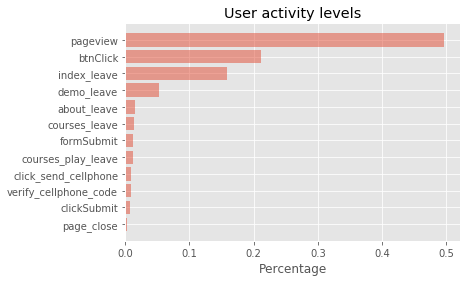

In [4]:
objects = list(Event.index)
objects[0] = 'pageview'
y_pos = np.arange(len(objects))
percentage = list(Event/65673)
plt.barh(y_pos, percentage, align='center', alpha = 0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Percentage')
plt.title('User activity levels')
plt.gca().invert_yaxis()

# Based on the bar plot, there are two major drops of user activity:
1. There is a sharp decrease from pageview to button click, indicating most users are not interested in clicking on the pages; 
2. There is a substantical drop from button click to click_send_cellphone, indicating some interested users are not willing to share their cell phone number. 

Suggestions based on these drops:
1. Improve page quality / user interface; 
2. Use email address instead of cell phone numbers as verification method

# Calculating Conversion Rate #

In [5]:
# converted records
converted_customer = cleaned_data['isSuccess'].value_counts(dropna = False)
converted_customer

NaN      64882
True       469
False      322
Name: isSuccess, dtype: int64

In [6]:
# Distinct User
Distinct_user = len(set(cleaned_data['distinct_id']))
Distinct_user

11708

In [7]:
#Conversion Rate
conversion_rate = 479/11708
conversion_rate

0.04091219678852067